# Taxonomy of time series learning tasks

* What is machine learning with time series? 
* How is it different from standard machine learning?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Learning objectives

You'll learn about

* different time series learning tasks;
* how to tell them apart.

---

## Learning tasks

#### 1. Generative setting: 
* We observe realisations of an assumed generative process, represented by random variables. 
* What is the assumed statistical dependence between the observations?
* What is the assumed relation we want to estimate? 
* We usually have to assume some consistency of the generative process over time (in forecasting, formally known as stationarity). Is the process likely to change? Can the deployment of our model change it?

#### 2. Learning: 
* We usually use an algorithm to fit a prediction function. 
* What is the input of the algorithm? 
* What is the input and output of the fitted prediction function? 
* What data is available during training and during prediction/deployment? 
* Are we in an online learning setting?
    
#### 3. Evaluation: 
* We estimate performance on unseen data.
* What do we mean by unseen data? For example, in forecasting, it's future values of the same instance. In classification, it's data from unseen instances. 
* The test set should be representative of the values we are trying to predict in deployment. 

---

## Single series

Time series comes in many shapes and forms. 

As an example, consider that we observe a chemical process in a [bioreactor](https://en.wikipedia.org/wiki/Bioreactor).  

<img src="../images/bioreactor.png" width=200 />


We may observe the repeated sensor readings for the pressure over time from a single bioreactor run. 

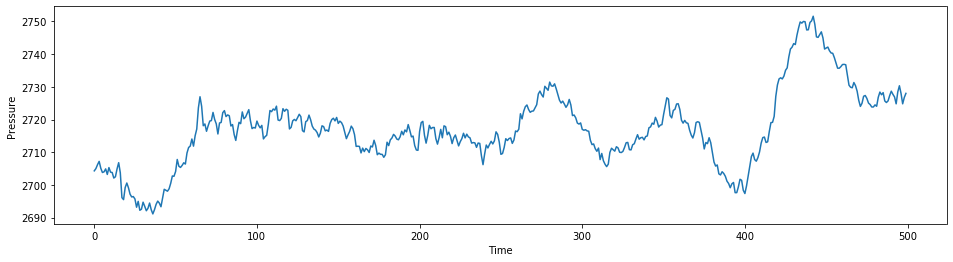

In [3]:
from utils import load_pressure

pressure = load_pressure()  # single pandas.Series
fig, ax = plt.subplots(1, figsize=(16, 4))
pressure.plot(ax=ax)
ax.set(ylabel="Pressure", xlabel="Time");

Suppose you only have a single time series, what are some real-world problems that you encounter and may want to solve with machine learning? 

> * Time series annotation (e.g. outlier/anomaly detection, segmentation)
> * Forecasting

---

## Multiple time series

You may observe multiple time series. There are two ways in which this can happen:

### Multivariate time series
Here we observe two or more variables over time, with variables representing *different kinds of measurements* within a single *experimental unit* (e.g. readings from different sensors of a single chemical process).

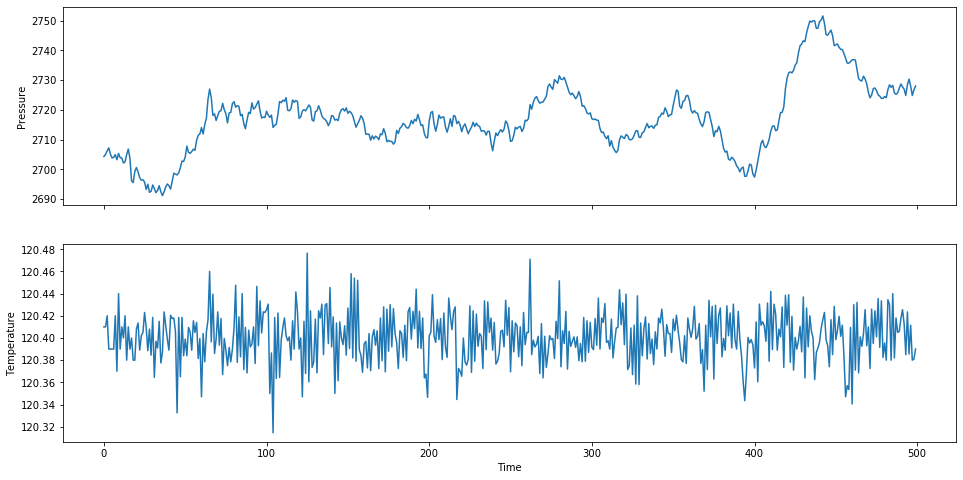

In [4]:
from utils import load_temperature
temperature = load_temperature()  # another pandas.Series

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(16, 8), sharex=True)
pressure.plot(ax=ax0)
temperature.plot(ax=ax1)
ax0.set(ylabel="Pressure")
ax1.set(ylabel="Temperature", xlabel="Time");

Suppose you have multivariate time series, what are some real-world problems that you encounter and may want to solve with machine learning? 

> * Time series annotation with additional variables
> * Forecasting with exogenous variables
> * Vector forecasting (forecasting multiple series at the same time)

---

### Panel data 
Sometimes also called longitudinal data, here we observe multiple independent instances of the *same kind(s) of measurements* over time, e.g. sensor readings from multiple separate chemical processes). 

In [6]:
from utils import load_experiments
experiments = load_experiments(variables="pressure")  # pandas.DataFrame
experiments.head()

time,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
run_id,,,,,,,,,,,,,,,,,,,,,
1,2704.3,2705.0,2706.2,2707.2,2705.1,2703.8,2704.0,2704.9,2703.2,2705.3,...,2728.680,2727.720,2726.915,2724.810,2728.455,2730.335,2727.980,2724.810,2726.755,2728.005
2,2706.4,2706.0,2704.9,2705.6,2705.4,2705.2,2706.5,2708.8,2707.6,2707.8,...,2720.365,2720.555,2722.385,2723.810,2722.330,2720.750,2718.820,2719.830,2718.390,2719.165
3,2705.5,2704.5,2707.0,2706.7,2704.8,2701.9,2703.7,2704.6,2706.7,2706.8,...,2729.260,2732.810,2732.280,2730.475,2729.335,2729.260,2728.720,2727.765,2729.900,2731.535
4,2705.3,2704.8,2704.4,2703.6,2705.1,2708.5,2705.6,2703.9,2698.8,2698.5,...,2727.655,2728.765,2728.740,2730.325,2731.310,2731.560,2731.430,2732.260,2734.145,2735.170
5,2704.8,2704.4,2706.1,2706.1,2705.4,2706.1,2705.7,2705.5,2702.2,2702.0,...,2719.480,2718.715,2720.720,2723.900,2723.635,2720.875,2720.835,2720.630,2721.130,2722.815


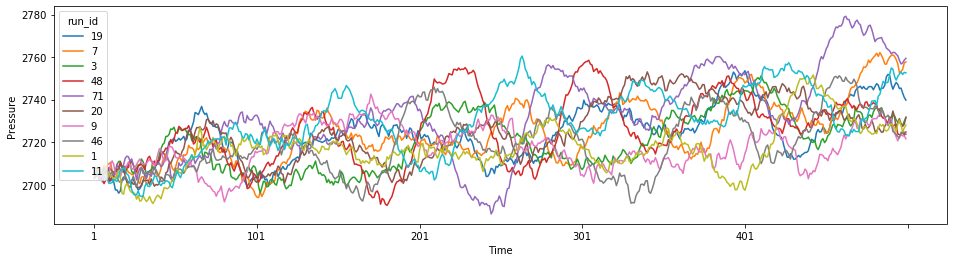

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 4))
experiments.sample(10).T.plot(ax=ax)
ax.set(ylabel="Pressure", xlabel="Time");

Panel data may be multivariate (i.e. i.i.d. instances of multivariate time series). In this case, the different instances are i.i.d., but the univariate component series within an instance are not. 

Panel data may also be mixed with time-constant variables. 

Suppose you have panel data, what are some real-world problems that you encounter and may want to solve with machine learning? 

> * Supervised time series annotation
> * Panel/supervised forecasting
> * "Series-as-features" learning tasks, i.e. time series classification/regression/clustering

---
## Time series data and statistical dependence 
* An intrinsic characteristic of time series is that observations are statistically depend on past observations. So, they don't naturally fit into the standard machine learning setting where we assume to have i.i.d. instances.
* In multivariate data, it is implausible to assume that the different univariate component time series are independent and identically distributed (i.i.d.). 
* In panel data, it is plausible to assume that the different instances are i.i.d., while time series observations within a given instance may still depend on past observations. 

---
## Why does it matter?

* Different learning tasks require different types of algorithms to solve them (e.g. time series classifiers or forecasters).
* If you misdiagnose the task associated with the real-world problem you're trying to solve, your algorithm may not work in deployment.
* If you misdiagnose the task, your performance estimates may be unreliable. Performance estimates tell us how well our model will perform when we deploy it. They allow us to make informed choices about which model to deploy. But our estimates are only reliable, if we properly take into account the statistical dependence of the data we use to obtain our estimates. 

---
## More complications

In many real-world application we find:

* **time-heterogeneous** data where instances/variables may not share a common time index (e.g. unequal length time series data, timestamped data)
* **type-heterogeneous** data where different variables have different types (e.g. categoricals, floats)


#### How to represent this kind of data for the purpose of machine learning?

* Usually we have instances in rows, variables in columns, but how to fit in time points?
* Which format (wide format, long format, etc)?
* Which data container to use (numpy, pandas, xarray, custom data container, etc)? 

For more details, see our [wiki entry](https://github.com/alan-turing-institute/sktime/wiki/Time-series-data-container). 

---
## Summary

We've discussed different time series learning tasks and how to tell them apart. 

* **Time series annotation** (anomaly detection, change point detection, segmentation)
* **Time series classification/regression/clustering**
* **Forecasting** (classical, supervised/panel, vector)

Variations:
* univariate or multivariate
* online learning (new time points and/or instances)

For more mathematical descriptions of these tasks, see our [paper](http://learningsys.org/neurips19/assets/papers/sktime_ml_systems_neurips2019.pdf).

---

## Reduction

While these tasks are distinct, they are also related. 

Reduction is essentially the idea that an algorithm for one task can be adapted to help solve another task.

A classical example of reduction in supervised learning is one-vs-all classification, reducing 𝑘-way multi-category classification to 𝑘 binary classification tasks. 

Reduction approaches are very popular in machine learning with time series.

### Example: from forecasting to standard regression
For time series, a common example is reduce classical forecasting to regression, which is usually done as follows: We first split the training series into fixed-length windows and stack them on top of each other. This gives us a tabular matrix of lagged values, so that we can use any standard regression algorithm from scikit-learn. Once we have a fitted regression algorithm, we can generate forecasts recursively.

![](../images/forecasting-to-regression-reduction.png)

More on this in the tutorial notebook on forecasting.

### More reductions

There are many more reduction relations, here's an overview:

![](../images/reduction-relations.png)

For more details, see our [paper](http://learningsys.org/neurips19/assets/papers/sktime_ml_systems_neurips2019.pdf).

## References

* Löning, Markus, Anthony Bagnall, Sajaysurya Ganesh, Viktor Kazakov, Jason Lines, and Franz J. Király (2019), "sktime: A Unified Interface for Machine Learning with Time Series." Workshop on Systems for ML at NeurIPS 2019.
* The data that we're using in this notebook is an small extract from the Tennessee Eastman Process Simulation Data for Anomaly Detection. You can download the full data set [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6C3JR1).